In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from fancyimpute import IterativeImputer


In [2]:
pd.options.display.max_columns = 500
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
## read the train file
df = pd.read_csv('D:/datasets/excercise/classification assignment/exercise_40_train.csv')

In [4]:
# take a look at the file
df.head()

y        x1         x2        x3        x4        x5        x6        x7  \
0  0  0.165254  18.060003       Wed  1.077380 -1.339233 -1.584341   0.0062%   
1  1  2.441471  18.416307    Friday  1.482586  0.920817 -0.759931   0.0064%   
2  1  4.427278  19.188092  Thursday  0.145652  0.366093  0.709962   -8e-04%   
3  0  3.925235  19.901257   Tuesday  1.763602 -0.251926 -0.827461  -0.0057%   
4  0  2.868802  22.202473    Sunday  3.405119  0.083162  1.381504   0.0109%   

         x8        x9       x10         x11       x12       x13       x14  \
0  0.220784  1.816481  1.171788  109.626841  4.644568  4.814885  1.541740   
1  1.192441  3.513950  1.419900   84.079367  1.459868  1.443983       NaN   
2  0.952323  0.782974 -1.247022   95.375221  1.098525  1.216059  0.450624   
3 -0.520756  1.825586  2.223038   96.420382 -1.390239  3.962961       NaN   
4 -0.732739  2.151990 -0.275406   90.769952  7.230125  3.877312  0.392002   

        x15         x16       x17        x18                 x19       x20  \
0 -0.587361  101.906052  4.278444  77.709700  $-908.650758424405  7.328029   
1 -1.165869  100.112121  8.487132  70.808566   $-1864.9622875143  6.796408   
2  0.211685   99.215210  8.601193  75.922820  $-543.187402955527  3.802395   
3 -2.046856         NaN  6.611554  74.966925  $-182.626380634258  7.728963   
4 -1.201565  100.626558  9.103015  77.977156   $967.007090837503  2.272765   

         x21         x22       x23     x24       x25       x26          x27  \
0  36.601967  126.384294  1.264713  female  3.834082  2.352406   905.491445   
1   3.789176   93.037021  0.346201    male  4.345028  1.651579   868.784447   
2   7.407996   71.022413  0.070968    male  4.332644 -0.375737  1077.233497   
3   8.136213  121.610846  0.700954    male  7.294990 -0.603983  1051.655489   
4  24.452102   56.492317 -1.102387    male  6.313827  0.429187   949.904947   

         x28       x29  x30  x31       x32        x33        x34       x35  \
0  14.779467  0.752524  NaN   no -0.597288   Colorado  46.667221  3.159002   
1  25.914680  1.445294  NaN   no  1.127376  Tennessee  47.928569 -1.013712   
2  13.177479  4.174536  NaN   no  2.605279      Texas  56.674425  0.108486   
3  17.006528  2.347355  NaN   no  1.071202  Minnesota  59.154933  1.319711   
4  16.962710  0.510985  NaN  yes  2.283921   New York  46.445617  0.022747   

         x36        x37        x38         x39        x40            x41  \
0  69.444841  32.450076        NaN  5-10 miles  18.129499            NaN   
1  61.289132  35.521824  31.526217  5-10 miles  11.389081   99074.100620   
2  69.798923  30.684074  31.049447  5-10 miles  14.372443  100087.339539   
3  65.408246  34.401290  48.363690  5-10 miles  13.191173  100934.096543   
4  66.662910  31.135261  31.819899  5-10 miles  17.210430            NaN   

        x42       x43       x44       x45       x46        x47        x48  \
0  0.904626  1.227266  0.703326 -0.810371  0.234654  53.359113  58.251700   
1 -1.157897 -0.822055 -0.851141  2.651773  1.104631  37.728834  56.052749   
2  0.869508  0.150728       NaN -0.856591 -2.561083  50.236892  63.975108   
3       NaN -0.965711       NaN  0.422522 -2.123048  41.857197  59.226119   
4       NaN  1.012093       NaN -0.348240  3.477451  47.844153  55.921988   

         x49          x50       x51        x52        x53       x54       x55  \
0  16.084987  1602.756464  2.740134   7.617666  72.167186  0.166127       NaN   
1        NaN  3350.837875  1.995635        NaN  73.964560       NaN       NaN   
2   6.998154  3756.910196  1.772648  15.057485  59.428690  1.844493       NaN   
3        NaN  1961.609788  3.155214        NaN  68.671023 -1.020225  5.833712   
4        NaN  2345.195505  3.253079  14.193721  71.853326  0.926779  4.115990   

        x56  x57         x58  x59        x60       x61       x62       x63  \
0 -1.532562  NaN  300.629990    0     August  9.840873  6.600008  1.252479   
1  0.956001  NaN  300.629990    0      April  6.939395  3.864254  0.057936   
2  4.127857

In [5]:
## check data imbalance
px.histogram(df, x = 'y')

In [6]:
df['y'].value_counts()

y
0    34197
1     5803
Name: count, dtype: int64

In [7]:
#get list of categorical and non categorical columns
cat_cols = [col for col in df.columns if df[col].dtypes =='O']
non_cat_cols =  [col for col in df.columns if df[col].dtypes !='O']

In [8]:
df_cat = df[cat_cols].copy()
df_num = df[non_cat_cols].copy()

In [9]:
df_cat.describe()

x3       x7                 x19     x24    x31         x33  \
count       40000    40000               40000   36144  40000       32829   
unique         14      663               40000       2      2          51   
top     Wednesday  0.0022%  $-908.650758424405  female     no  California   
freq         4930      193                   1   18158  34022        3393   

               x39       x60          x65    x77    x93    x99  
count        40000     40000        40000  30743  40000  27164  
unique           1        12            5      7      2      1  
top     5-10 miles  December  progressive   ford     no    yes  
freq         40000      8136        10877   9005  35506  27164

In [10]:
# x3 var will need its values fixed
print(df_cat['x3'].unique())

['Wed' 'Friday' 'Thursday' 'Tuesday' 'Sunday' 'Saturday' 'Sat' 'Wednesday'
 'Sun' 'Tue' 'Thur' 'Monday' 'Fri' 'Mon']


In [11]:
# x7 and x19 seems to be numerical variables but are labeled as objects due to '%' and '$'
df_cat[['x7','x19']].describe()

x7                 x19
count     40000               40000
unique      663               40000
top     0.0022%  $-908.650758424405
freq        193                   1

In [12]:
# x39 seems to only have 1 unique value, it could be possible to remove it
df_cat[['x39']].describe()

x39
count        40000
unique           1
top     5-10 miles
freq         40000

In [13]:
# x99 seems to only have 1 non null value, it could be possible that nan could be 'no'
df_cat['x99'].unique()

array(['yes', nan], dtype=object)

In [14]:
#while we are talking about categorical variables, we also note that x59 and x98 are categorical variables(or booleans)
#they come up as int due to their values, possible to fix their dtypes
df[['x59','x98']]

x59  x98
0        0    0
1        0    1
2        0    0
3        0    1
4        0    0
...    ...  ...
39995    0    1
39996    0    0
39997    0    1
39998    0    0
39999    1    1

[40000 rows x 2 columns]

In [15]:
### numerical columns

In [16]:
df_num.head()

y        x1         x2        x4        x5        x6        x8        x9  \
0  0  0.165254  18.060003  1.077380 -1.339233 -1.584341  0.220784  1.816481   
1  1  2.441471  18.416307  1.482586  0.920817 -0.759931  1.192441  3.513950   
2  1  4.427278  19.188092  0.145652  0.366093  0.709962  0.952323  0.782974   
3  0  3.925235  19.901257  1.763602 -0.251926 -0.827461 -0.520756  1.825586   
4  0  2.868802  22.202473  3.405119  0.083162  1.381504 -0.732739  2.151990   

        x10         x11       x12       x13       x14       x15         x16  \
0  1.171788  109.626841  4.644568  4.814885  1.541740 -0.587361  101.906052   
1  1.419900   84.079367  1.459868  1.443983       NaN -1.165869  100.112121   
2 -1.247022   95.375221  1.098525  1.216059  0.450624  0.211685   99.215210   
3  2.223038   96.420382 -1.390239  3.962961       NaN -2.046856         NaN   
4 -0.275406   90.769952  7.230125  3.877312  0.392002 -1.201565  100.626558   

        x17        x18       x20        x21         x22       x23       x25  \
0  4.278444  77.709700  7.328029  36.601967  126.384294  1.264713  3.834082   
1  8.487132  70.808566  6.796408   3.789176   93.037021  0.346201  4.345028   
2  8.601193  75.922820  3.802395   7.407996   71.022413  0.070968  4.332644   
3  6.611554  74.966925  7.728963   8.136213  121.610846  0.700954  7.294990   
4  9.103015  77.977156  2.272765  24.452102   56.492317 -1.102387  6.313827   

        x26          x27        x28       x29  x30       x32        x34  \
0  2.352406   905.491445  14.779467  0.752524  NaN -0.597288  46.667221   
1  1.651579   868.784447  25.914680  1.445294  NaN  1.127376  47.928569   
2 -0.375737  1077.233497  13.177479  4.174536  NaN  2.605279  56.674425   
3 -0.603983  1051.655489  17.006528  2.347355  NaN  1.071202  59.154933   
4  0.429187   949.904947  16.962710  0.510985  NaN  2.283921  46.445617   

        x35        x36        x37        x38        x40            x41  \
0  3.159002  69.444841  32.450076        NaN  18.129499            NaN   
1 -1.013712  61.289132  35.521824  31.526217  11.389081   99074.100620   
2  0.108486  69.798923  30.684074  31.049447  14.372443  100087.339539   
3  1.319711  65.408246  34.401290  48.363690  13.191173  100934.096543   
4  0.022747  66.662910  31.135261  31.819899  17.210430            NaN   

        x42       x43       x44       x45       x46        x47        x48  \
0  0.904626  1.227266  0.703326 -0.810371  0.234654  53.359113  58.251700   
1 -1.157897 -0.822055 -0.851141  2.651773  1.104631  37.728834  56.052749   
2  0.869508  0.150728       NaN -0.856591 -2.561083  50.236892  63.975108   
3       NaN -0.965711       NaN  0.422522 -2.123048  41.857197  59.226119   
4       NaN  1.012093       NaN -0.348240  3.477451  47.844153  55.921988   

         x49          x50       x51        x52        x53       x54       x55  \
0  16.084987  1602.756464  2.740134   7.617666  72.167186  0.166127       NaN   
1        NaN  3350.837875  1.995635        NaN  73.964560       NaN       NaN   
2   6.998154  3756.910196  1.772648  15.057485  59.428690  1.844493       NaN   
3        NaN  1961.609788  3.155214        NaN  68.671023 -1.020225  5.833712   
4        NaN  2345.195505  3.253079  14.193721  71.853326  0.926779  4.115990   

        x56  x57         x58  x59       x61       x62       x63        x64  \
0 -1.532562  NaN  300.629990    0  9.840873  6.600008  1.252479  46.992716   
1  0.956001  NaN  300.629990    0  6.939395  3.864254  0.057936  48.216622   
2  4.127857  NaN  182.369349    0  6.228138  1.370661 -0.239705  54.120933   
3  0.663759  NaN  300.629990    0  6.005140  0.013162  0.318335  54.784192   
4 -2.273628  NaN  149.725023    0  7.654926  1.305936  0.418272  51.486405   

        x66        x67        x68       x69       x70       x71        x72  \
0  1.212048  12.896733  15.263491  0.518653  0.543768 -0.912506  53.521544   
1  0.738526  14.402071  33.940951 -0.140384  1.016703 -0.000234  46.797571   
2 -0.032980  14.402071  18.21

[[<Axes: title={'center': 'y'}>]]
[[<Axes: title={'center': 'x1'}>]]
[[<Axes: title={'center': 'x2'}>]]
[[<Axes: title={'center': 'x4'}>]]
[[<Axes: title={'center': 'x5'}>]]
[[<Axes: title={'center': 'x6'}>]]
[[<Axes: title={'center': 'x8'}>]]
[[<Axes: title={'center': 'x9'}>]]
[[<Axes: title={'center': 'x10'}>]]
[[<Axes: title={'center': 'x11'}>]]
[[<Axes: title={'center': 'x12'}>]]
[[<Axes: title={'center': 'x13'}>]]
[[<Axes: title={'center': 'x14'}>]]
[[<Axes: title={'center': 'x15'}>]]
[[<Axes: title={'center': 'x16'}>]]
[[<Axes: title={'center': 'x17'}>]]
[[<Axes: title={'center': 'x18'}>]]
[[<Axes: title={'center': 'x20'}>]]
[[<Axes: title={'center': 'x21'}>]]
[[<Axes: title={'center': 'x22'}>]]
[[<Axes: title={'center': 'x23'}>]]
[[<Axes: title={'center': 'x25'}>]]
[[<Axes: title={'center': 'x26'}>]]
[[<Axes: title={'center': 'x27'}>]]
[[<Axes: title={'center': 'x28'}>]]
[[<Axes: title={'center': 'x29'}>]]
[[<Axes: title={'center': 'x30'}>]]
[[<Axes: title={'center': 'x32'}>]]
[

C:\Users\EHOT\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\tools.py:224: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



[[<Axes: title={'center': 'x48'}>]]
[[<Axes: title={'center': 'x49'}>]]
[[<Axes: title={'center': 'x50'}>]]
[[<Axes: title={'center': 'x51'}>]]
[[<Axes: title={'center': 'x52'}>]]
[[<Axes: title={'center': 'x53'}>]]
[[<Axes: title={'center': 'x54'}>]]
[[<Axes: title={'center': 'x55'}>]]
[[<Axes: title={'center': 'x56'}>]]
[[<Axes: title={'center': 'x57'}>]]
[[<Axes: title={'center': 'x58'}>]]
[[<Axes: title={'center': 'x59'}>]]
[[<Axes: title={'center': 'x61'}>]]
[[<Axes: title={'center': 'x62'}>]]
[[<Axes: title={'center': 'x63'}>]]
[[<Axes: title={'center': 'x64'}>]]
[[<Axes: title={'center': 'x66'}>]]
[[<Axes: title={'center': 'x67'}>]]
[[<Axes: title={'center': 'x68'}>]]
[[<Axes: title={'center': 'x69'}>]]
[[<Axes: title={'center': 'x70'}>]]
[[<Axes: title={'center': 'x71'}>]]
[[<Axes: title={'center': 'x72'}>]]
[[<Axes: title={'center': 'x73'}>]]
[[<Axes: title={'center': 'x74'}>]]
[[<Axes: title={'center': 'x75'}>]]
[[<Axes: title={'center': 'x76'}>]]
[[<Axes: title={'center': 'x

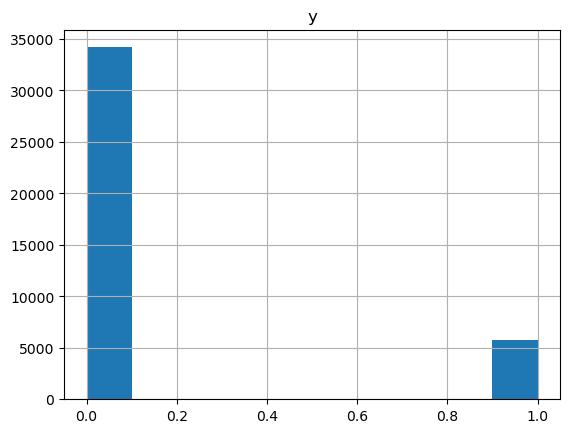

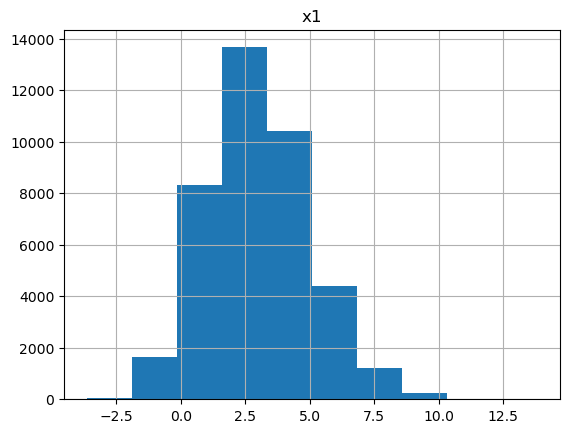

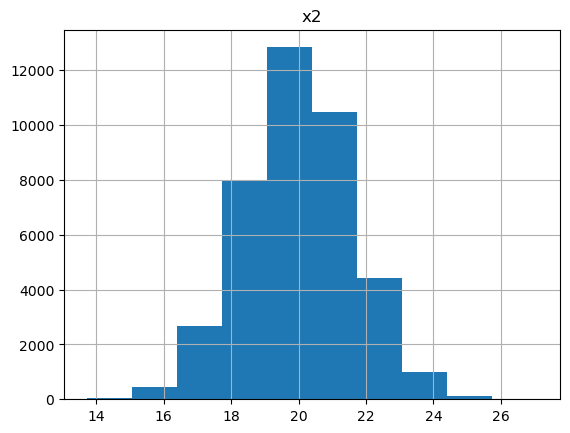

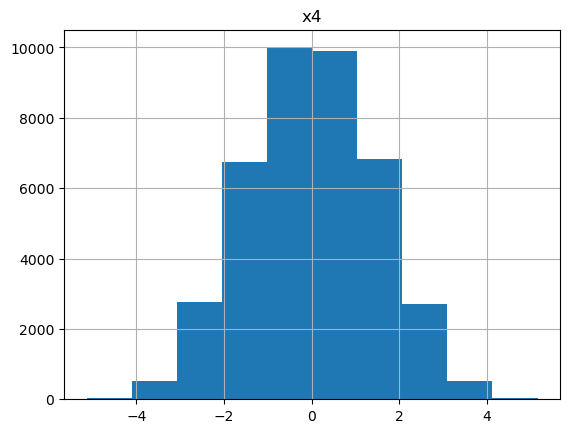

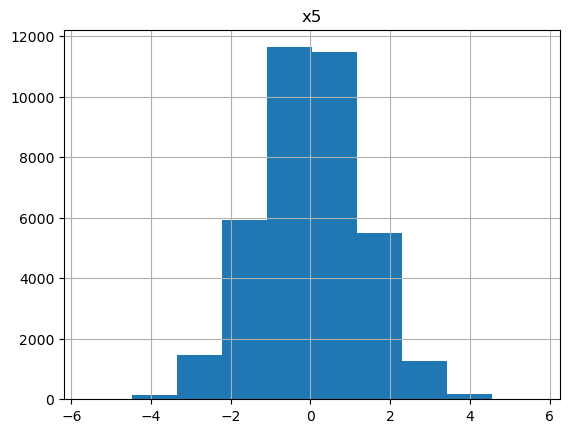

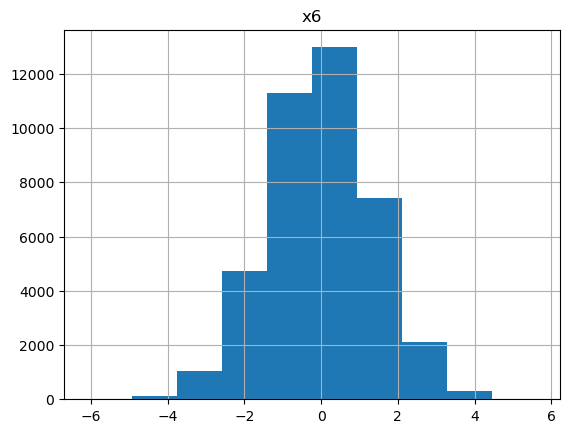

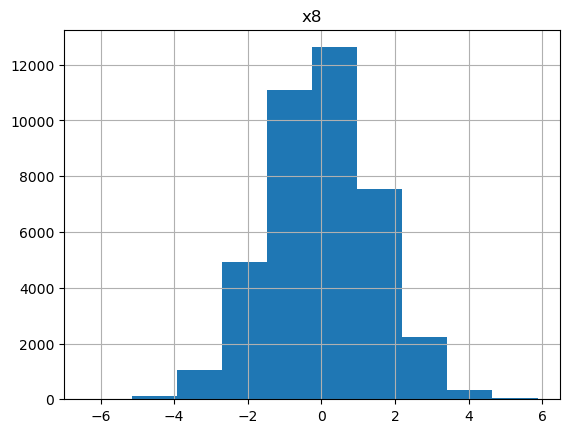

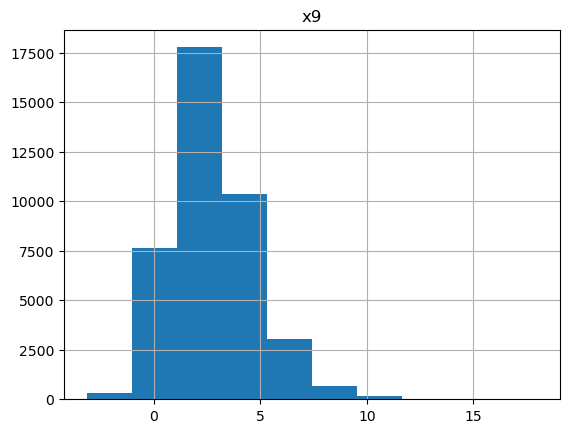

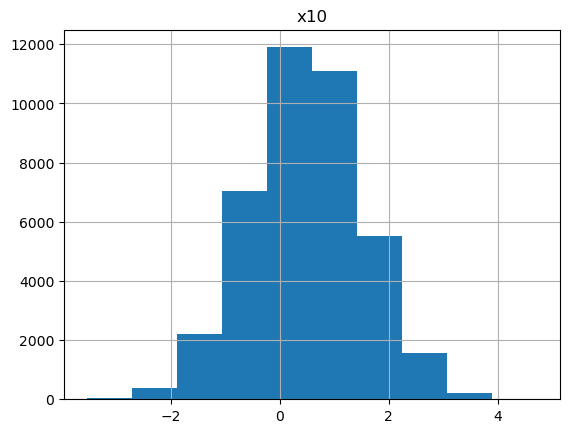

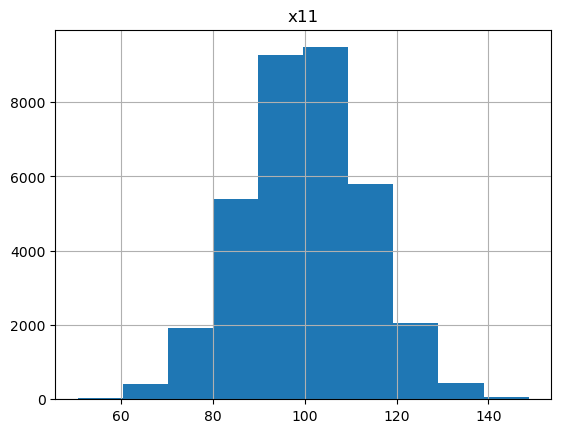

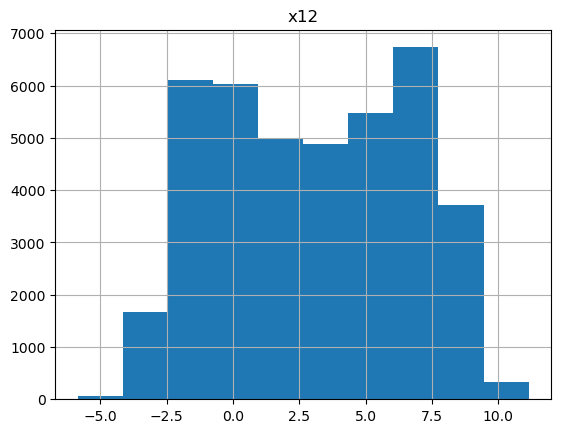

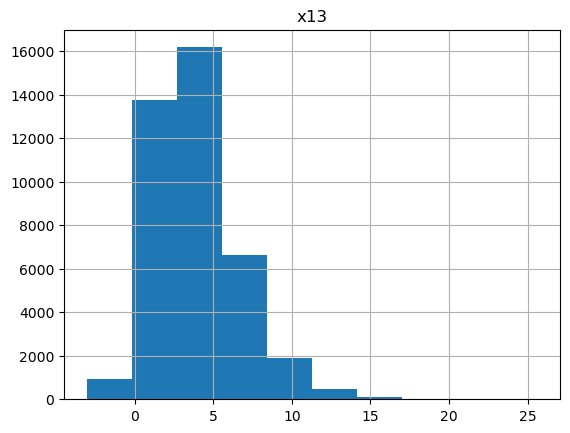

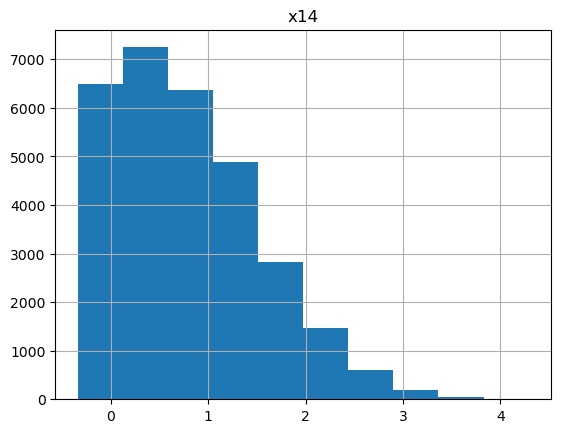

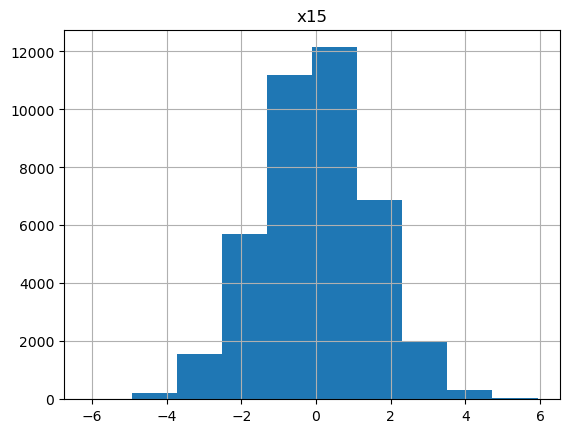

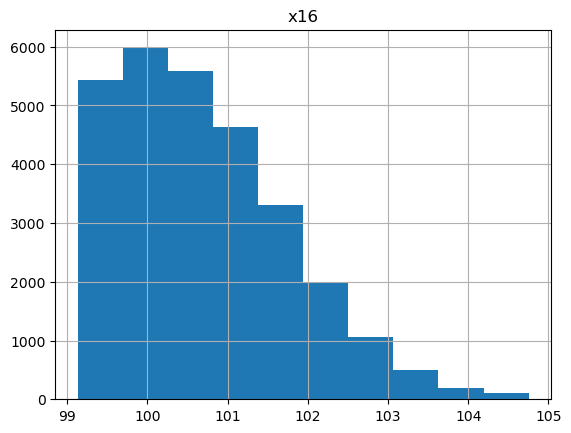

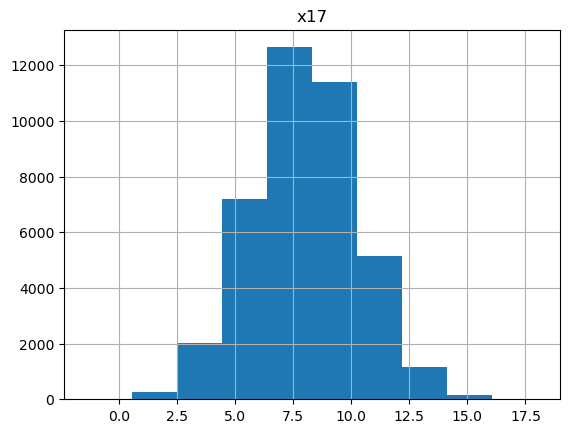

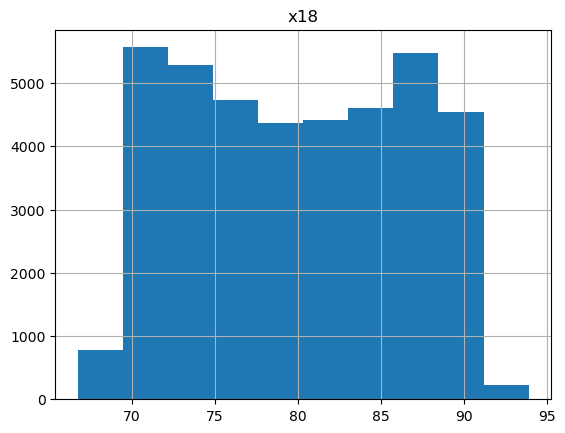

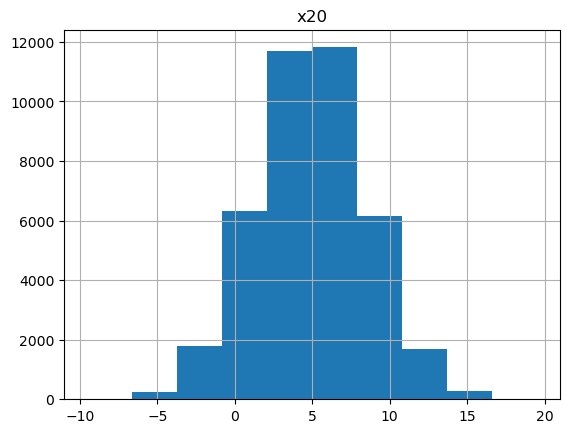

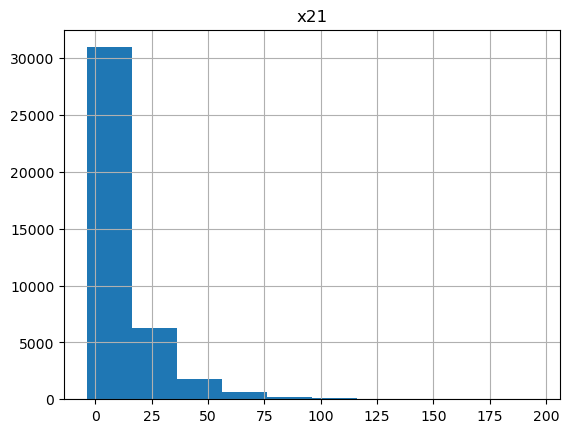

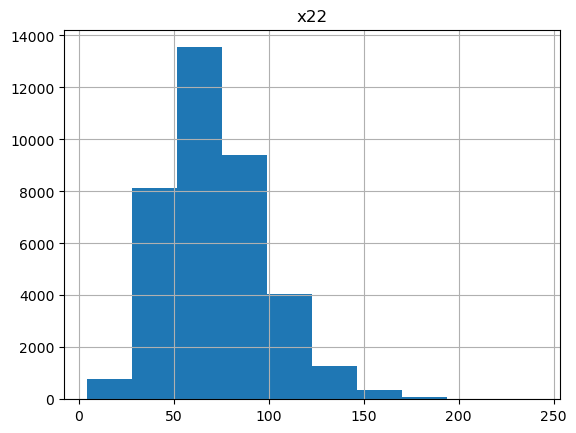

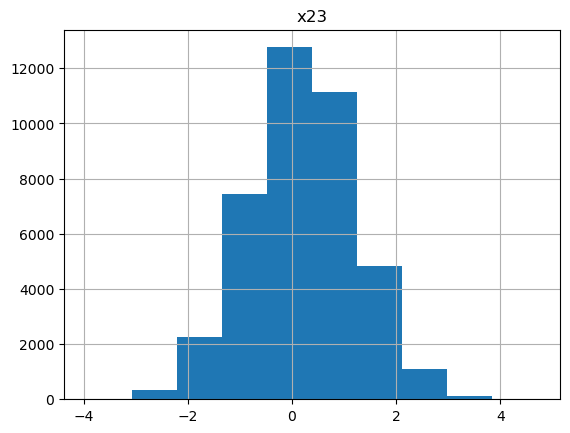

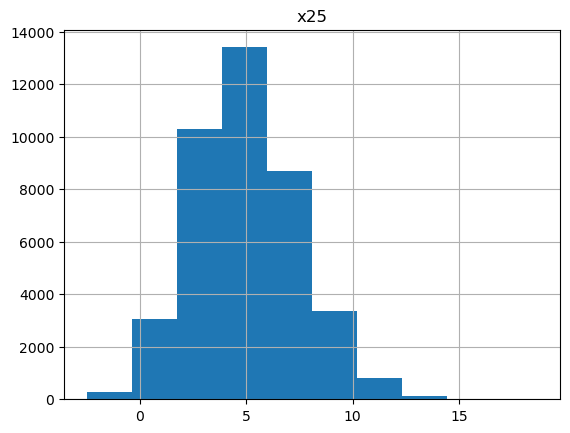

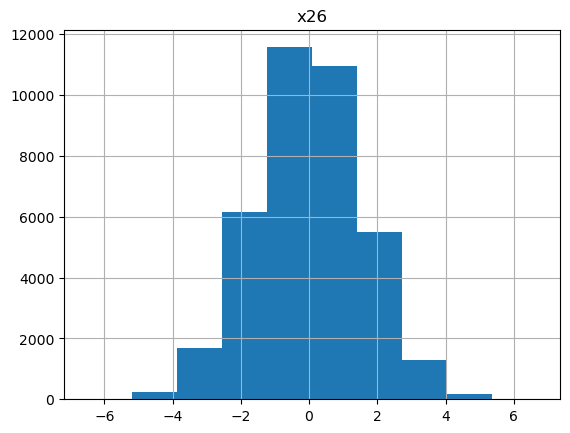

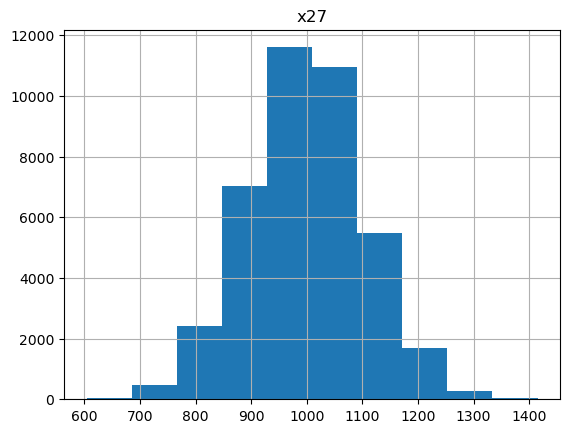

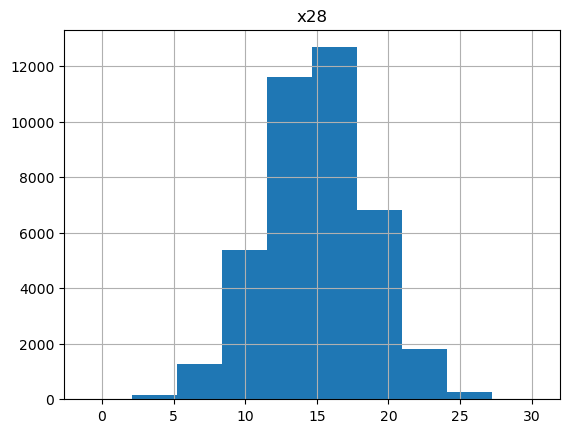

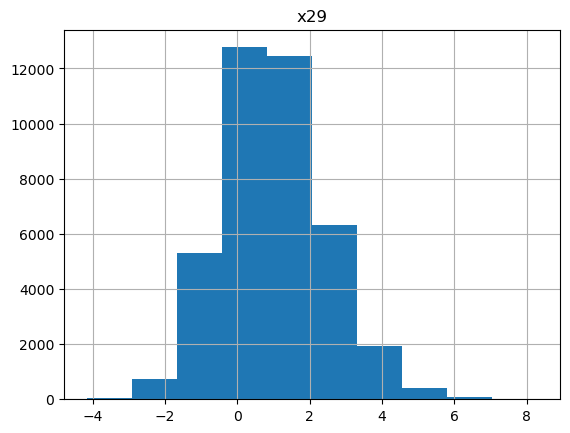

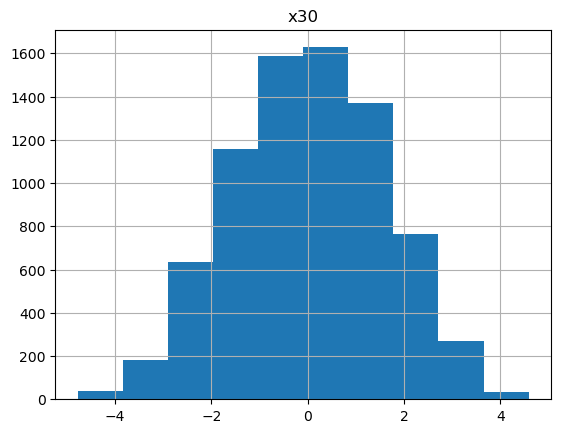

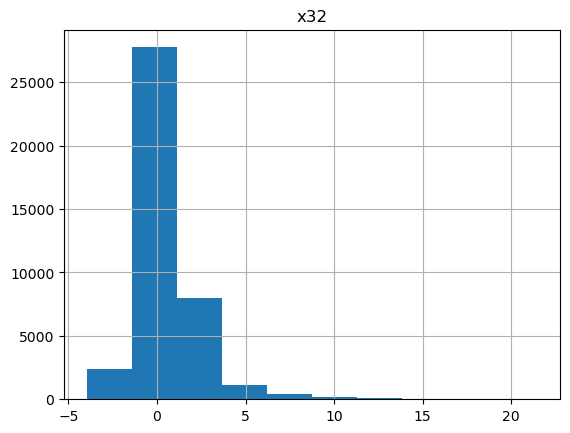

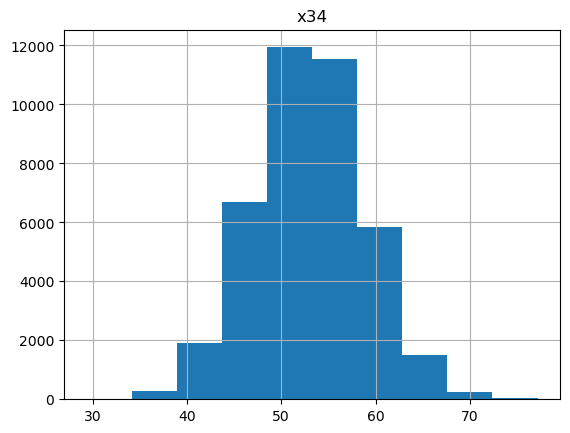

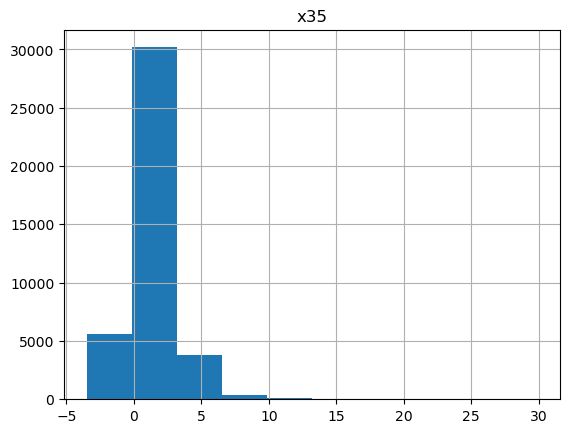

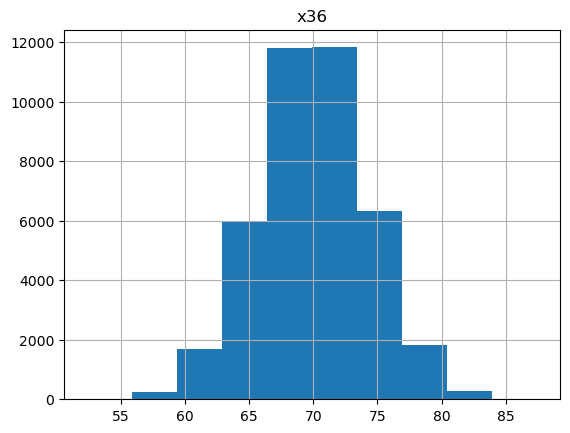

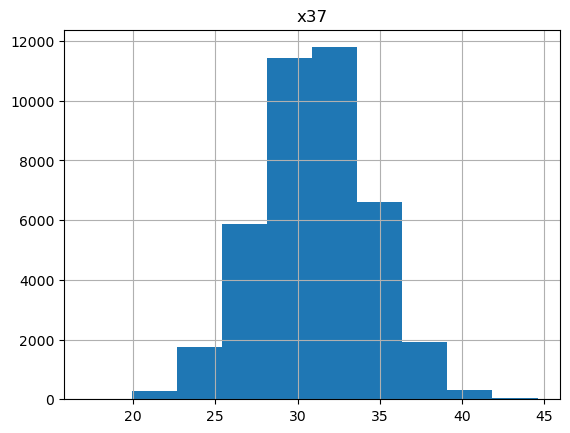

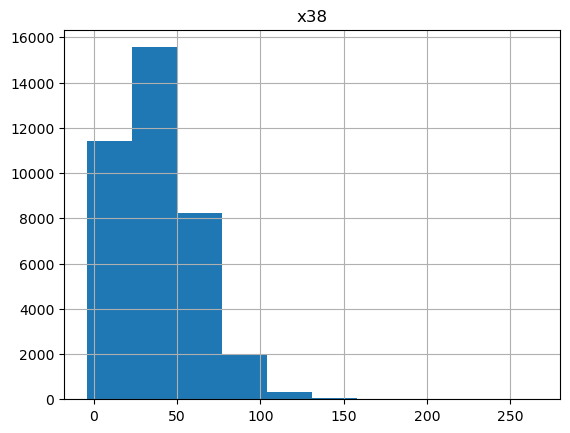

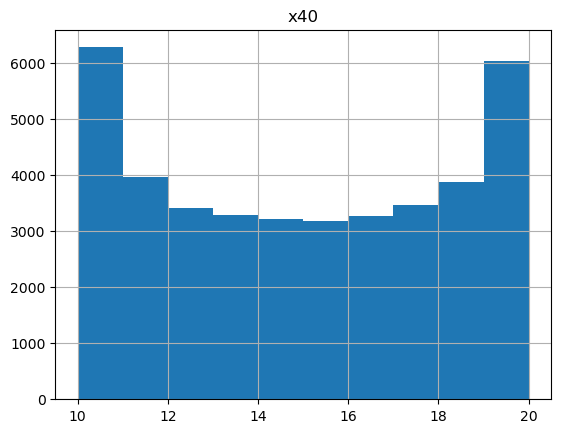

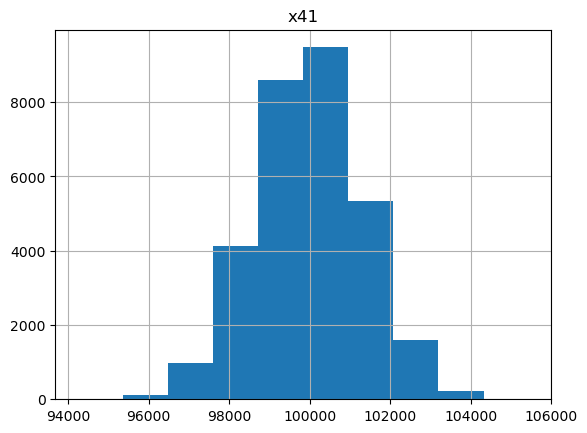

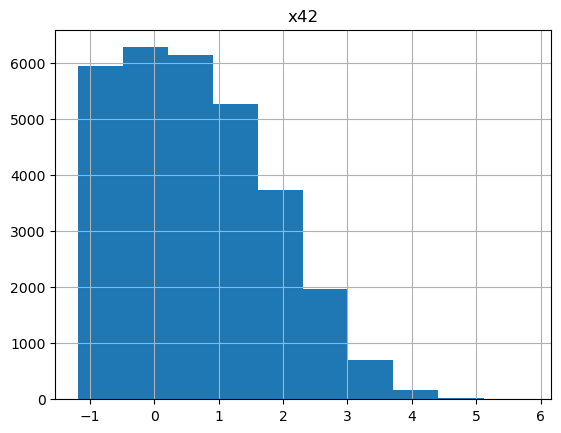

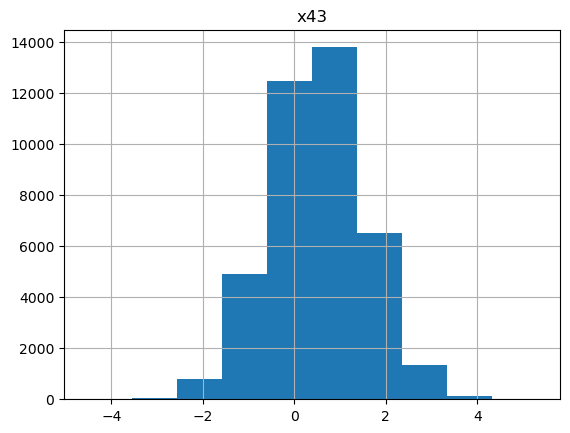

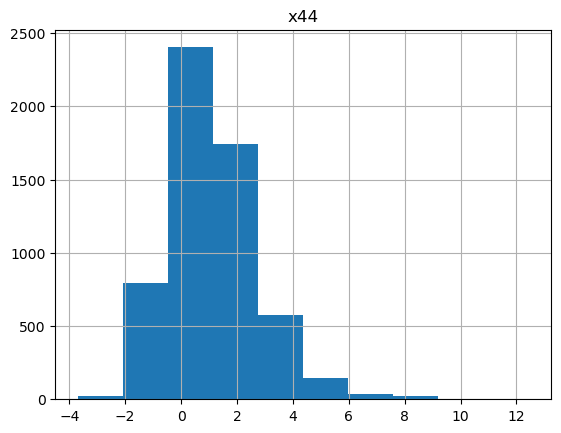

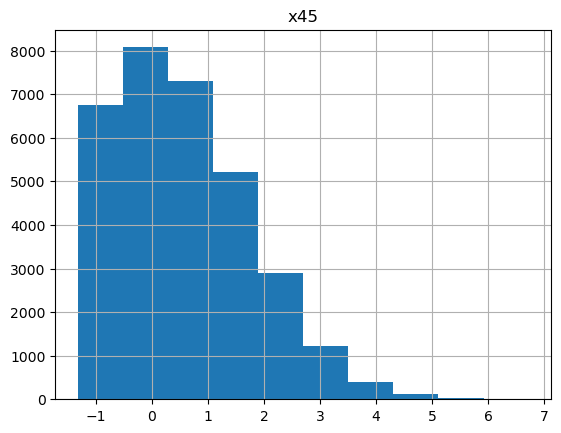

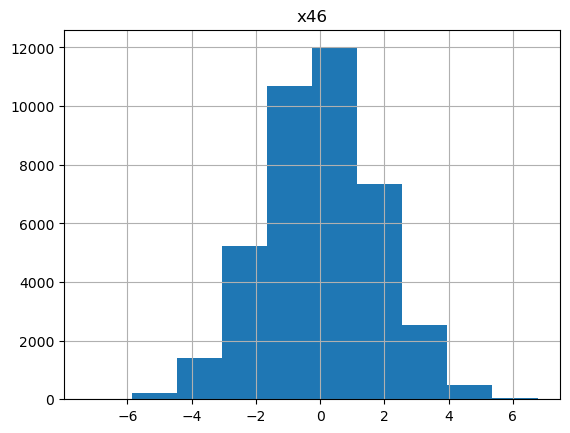

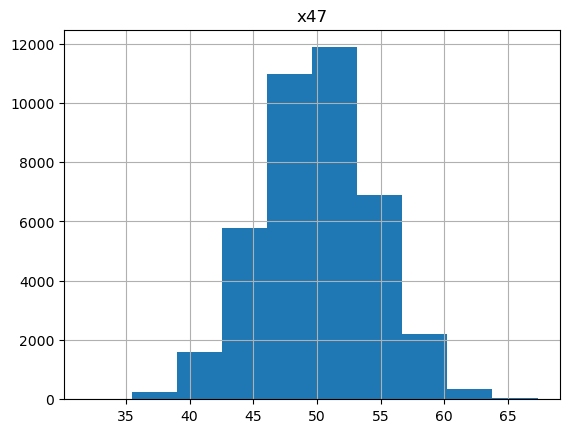

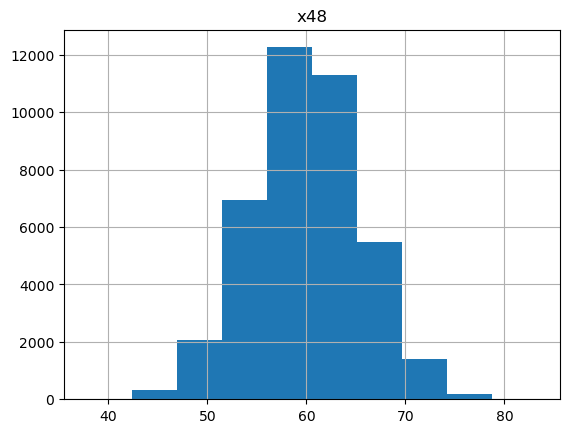

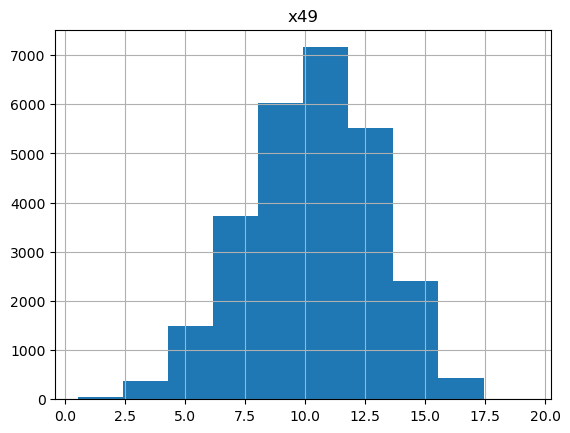

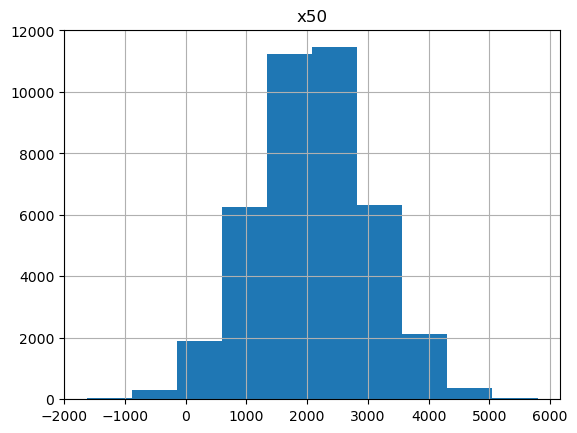

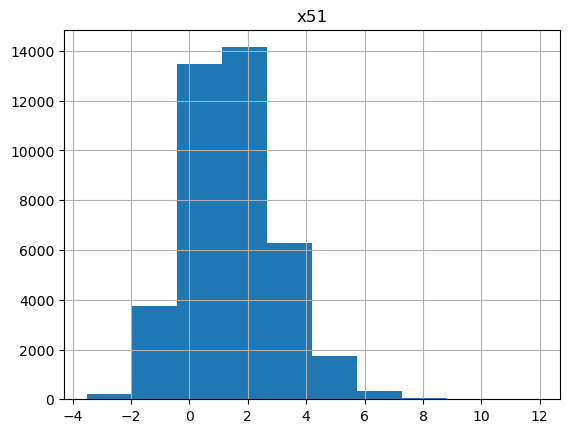

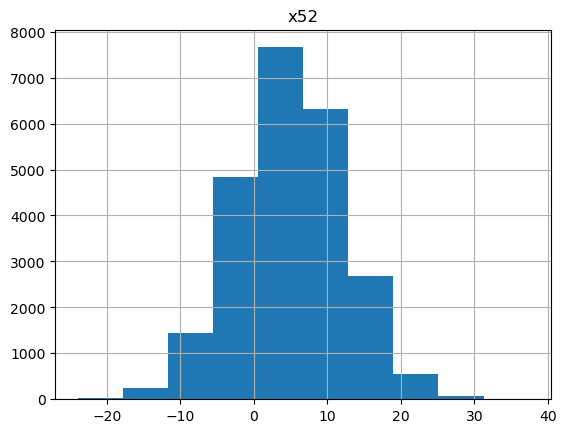

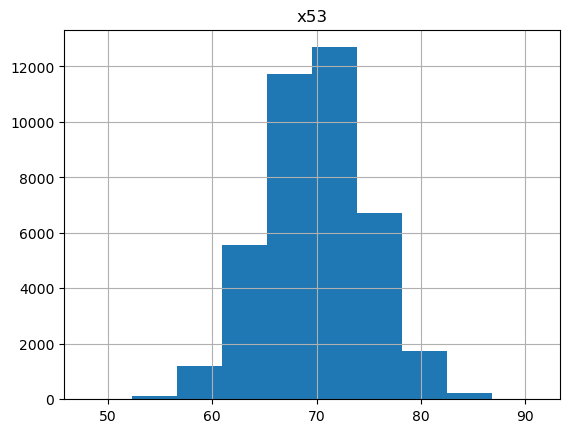

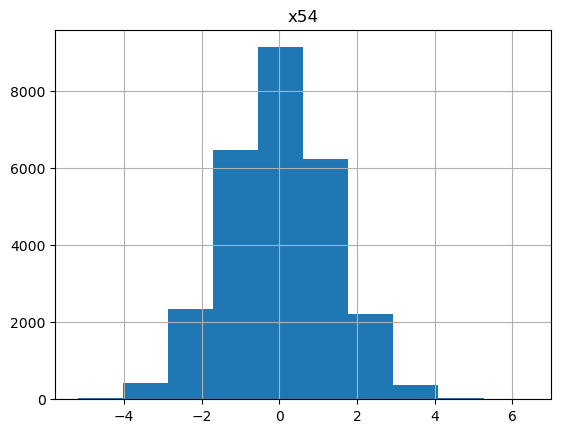

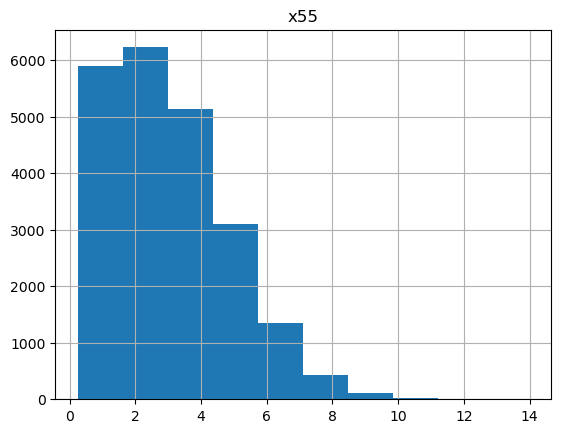

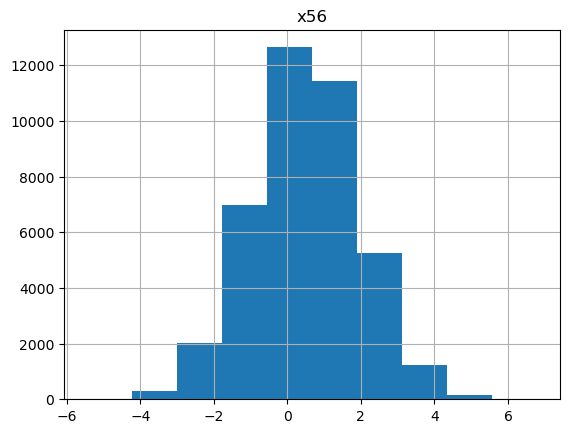

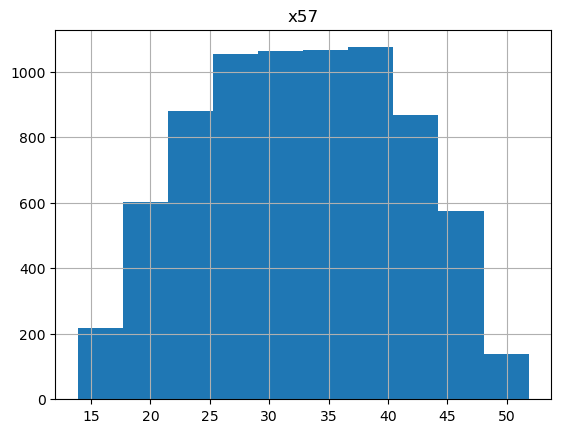

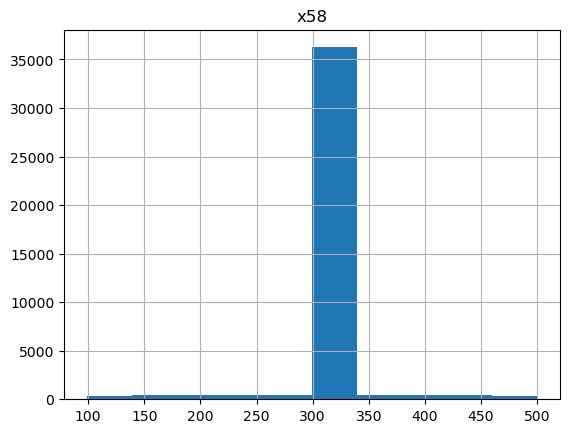

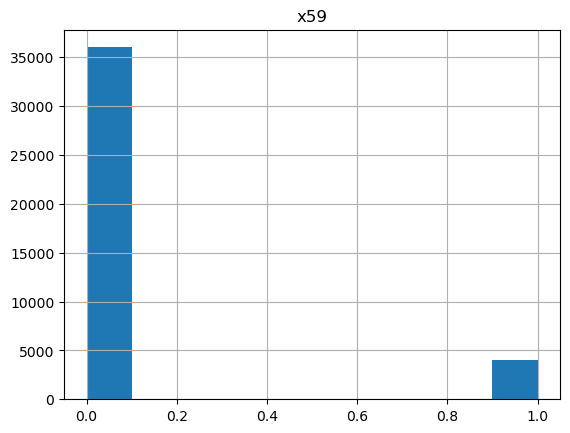

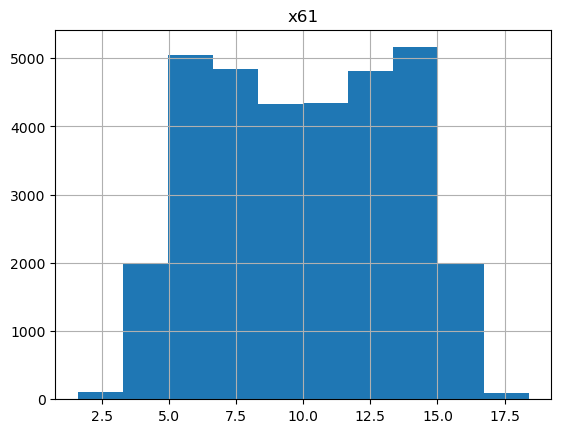

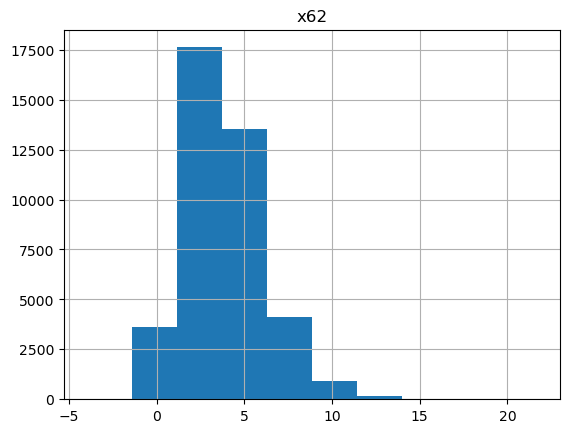

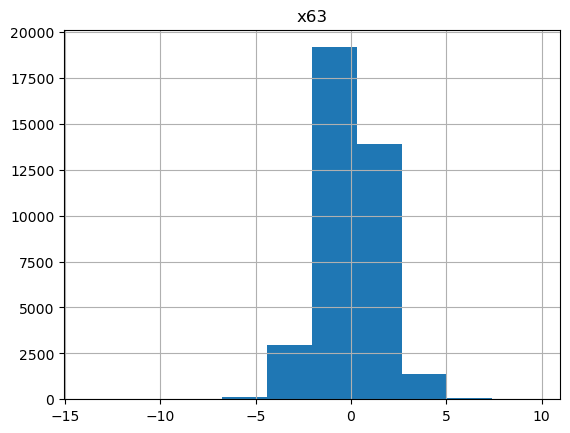

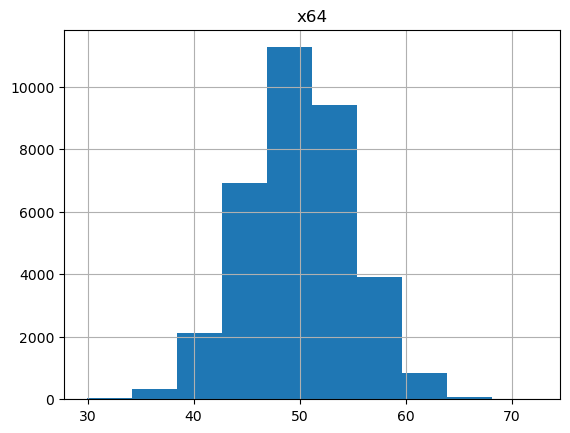

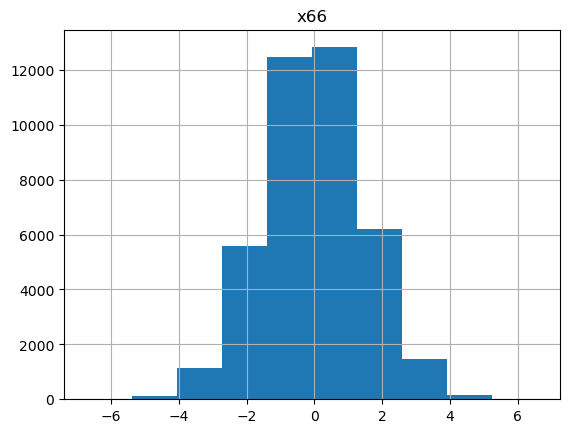

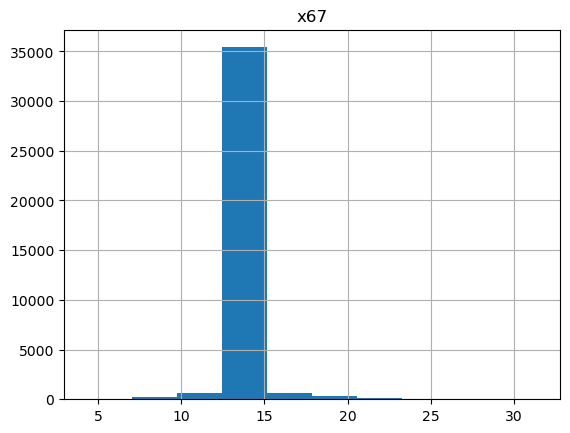

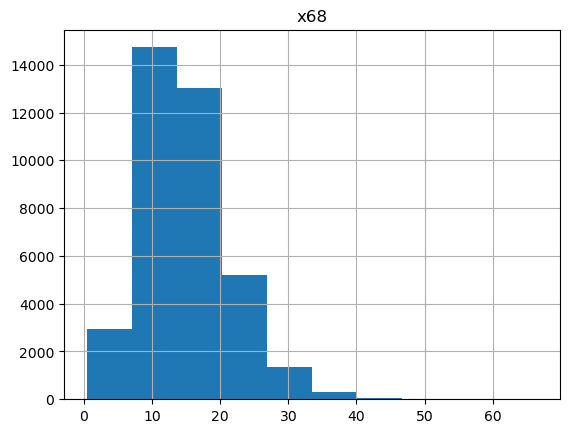

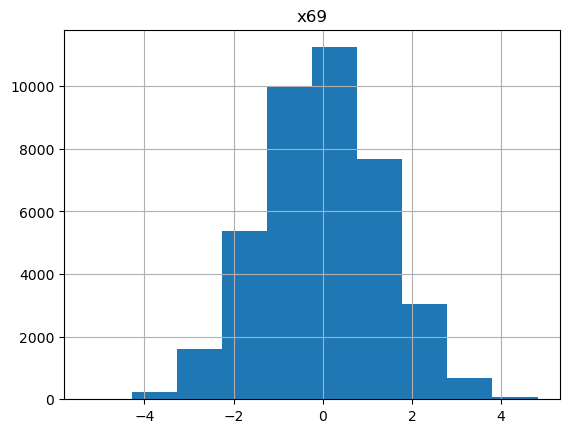

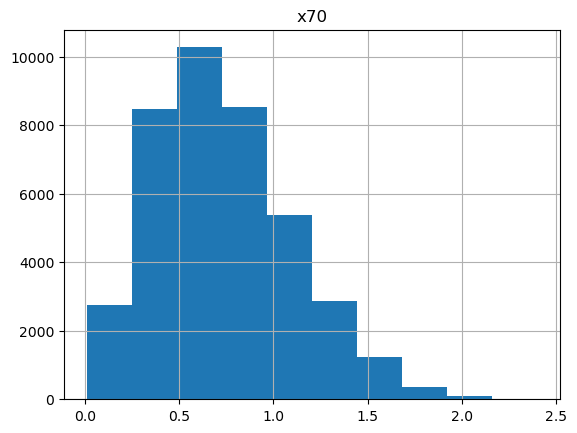

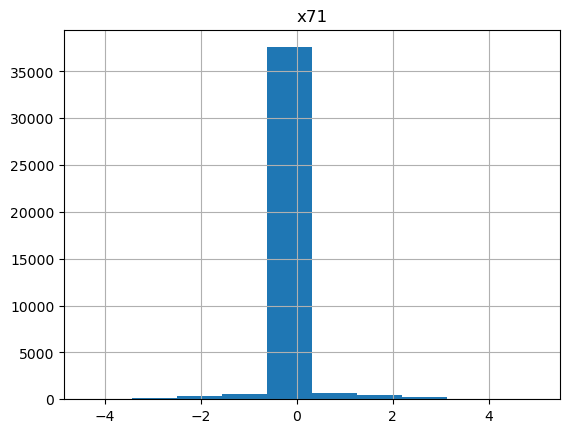

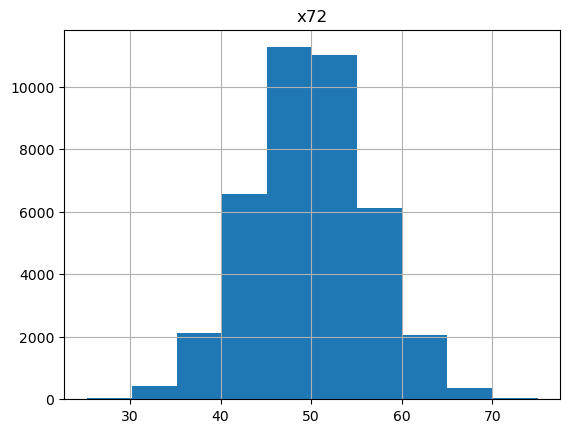

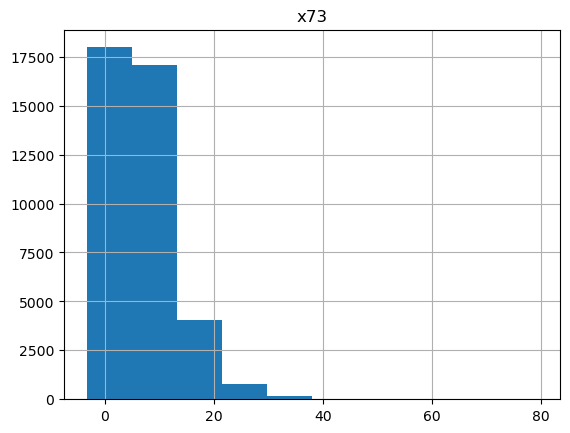

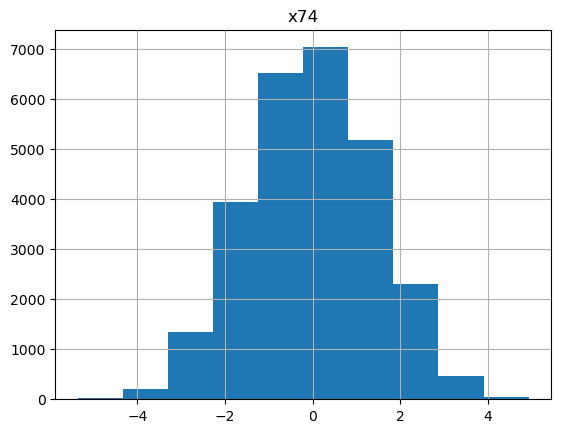

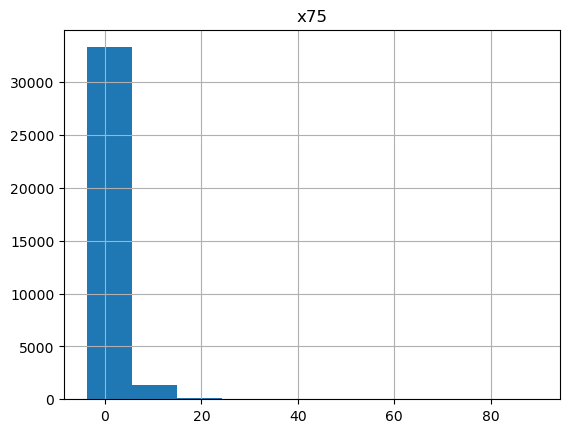

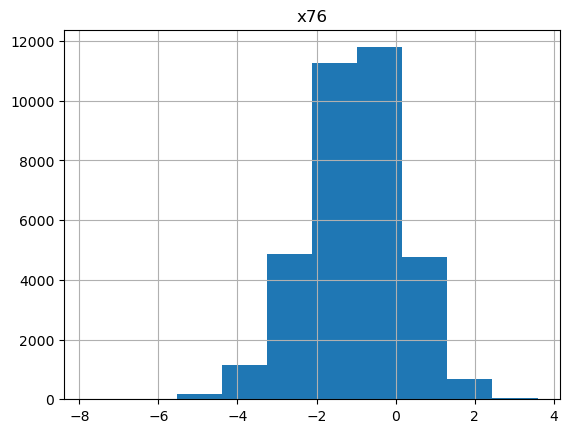

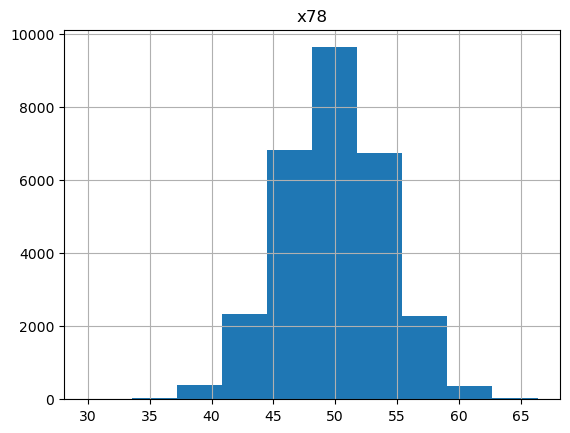

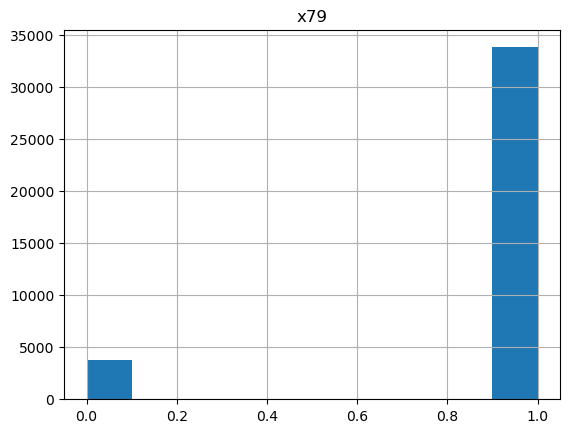

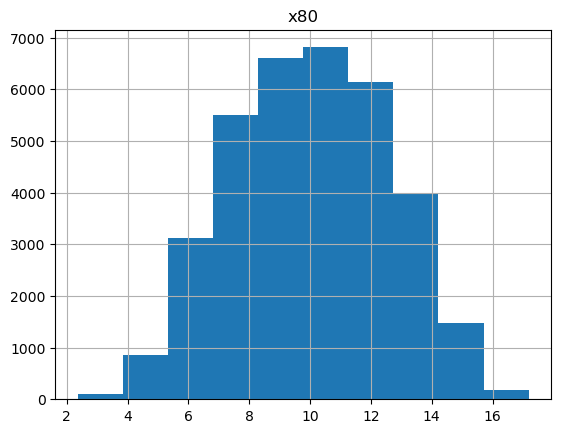

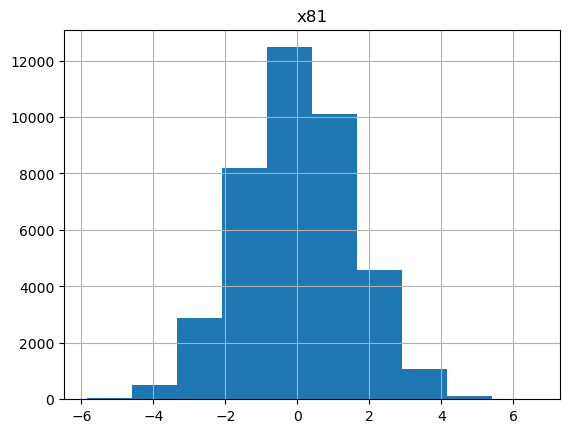

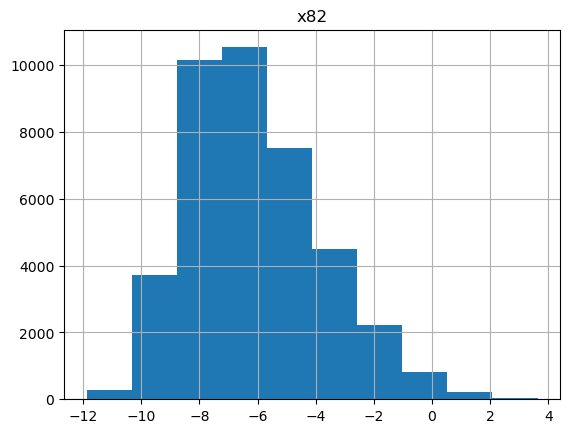

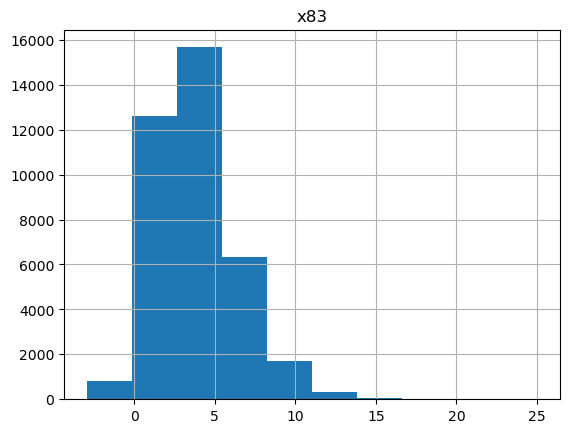

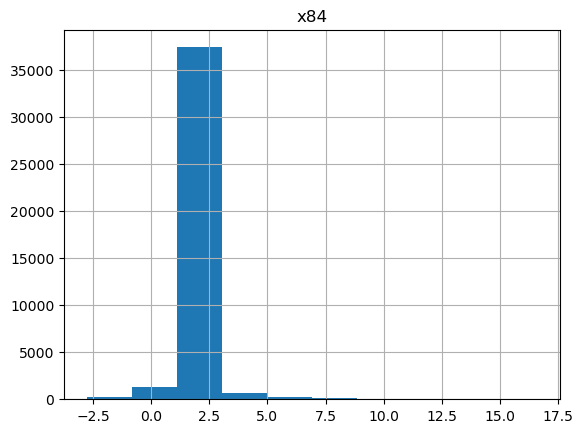

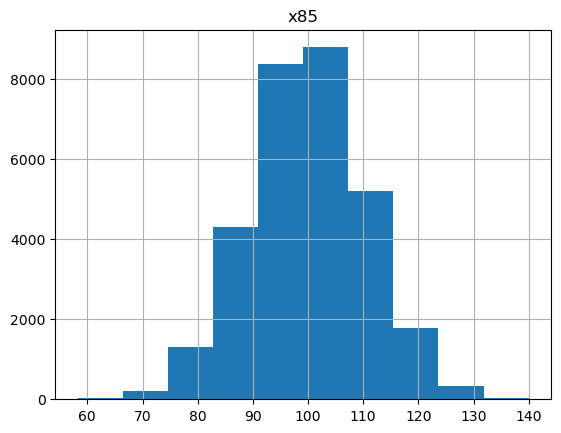

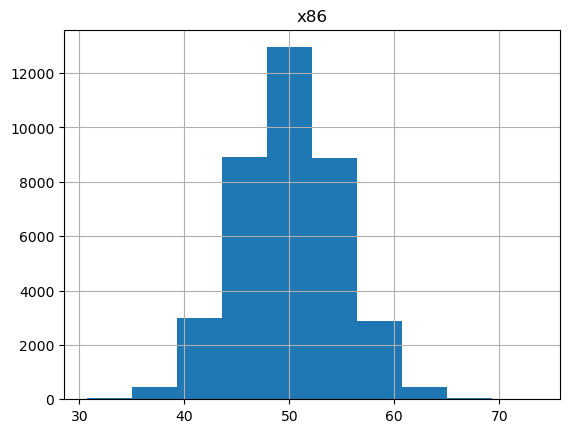

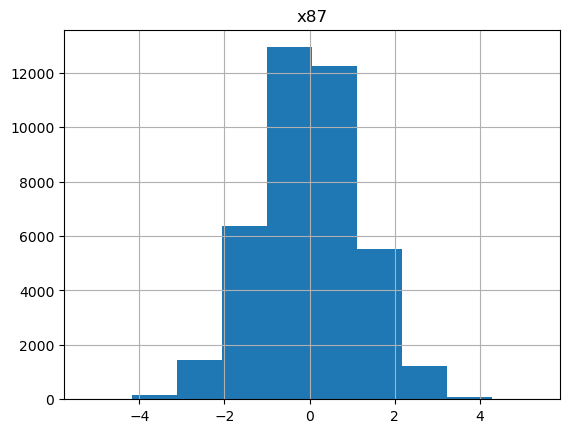

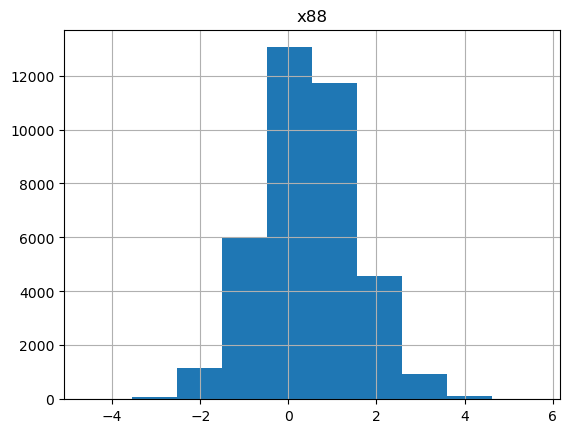

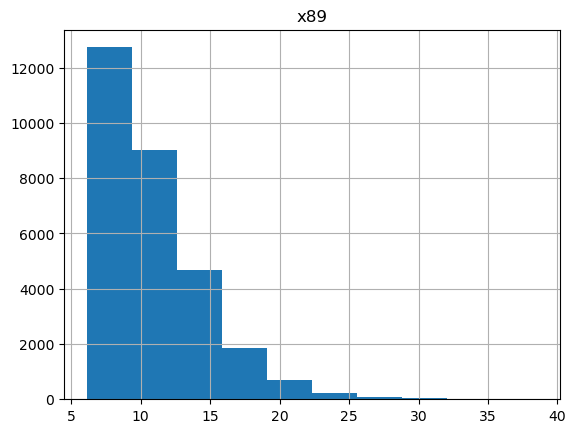

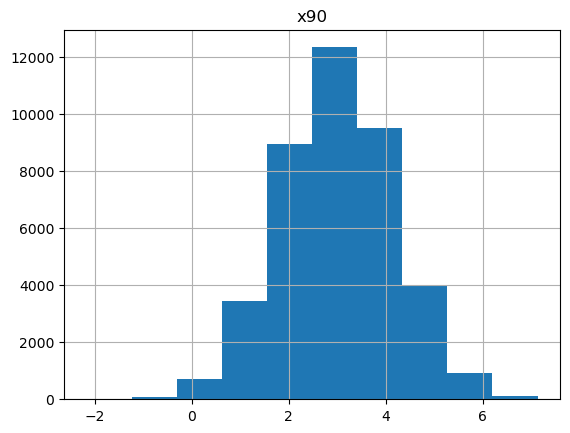

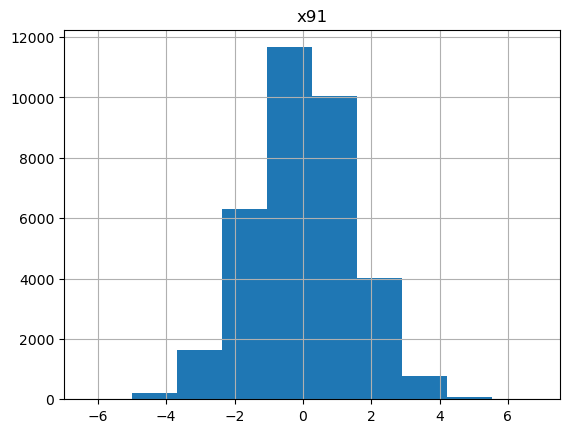

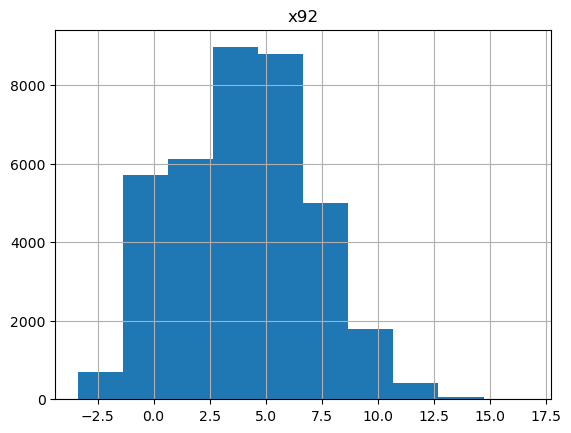

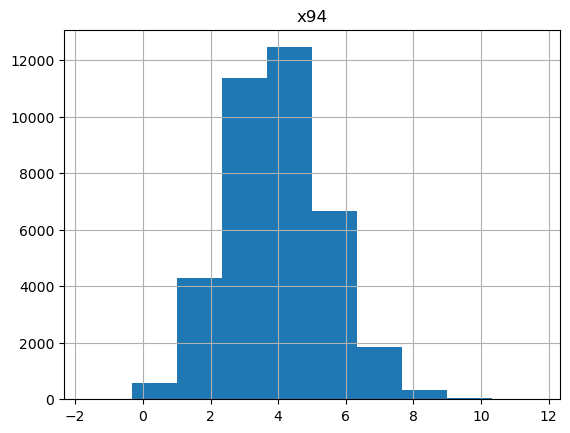

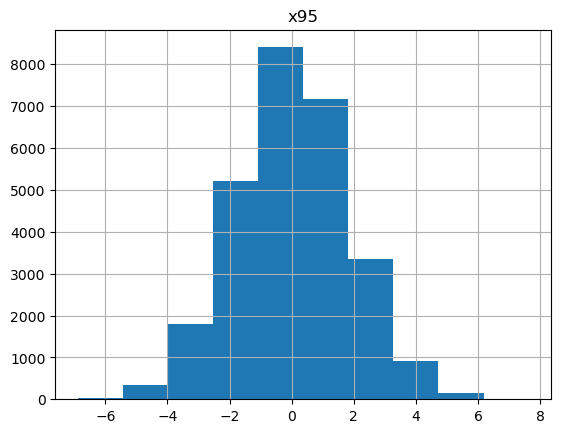

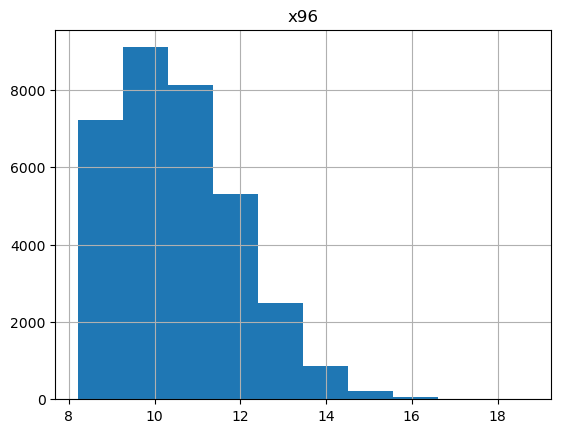

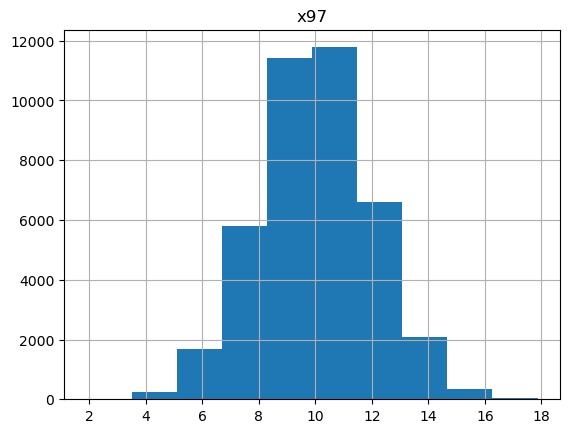

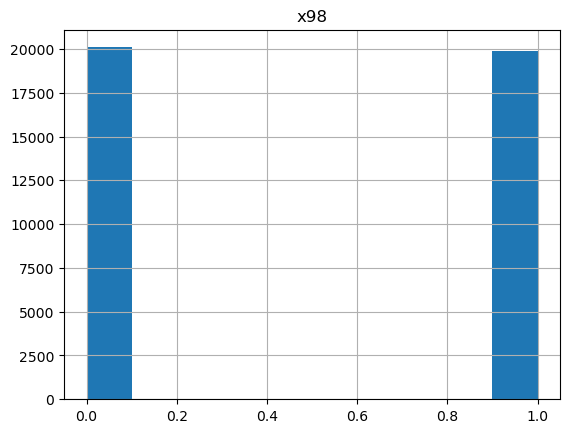

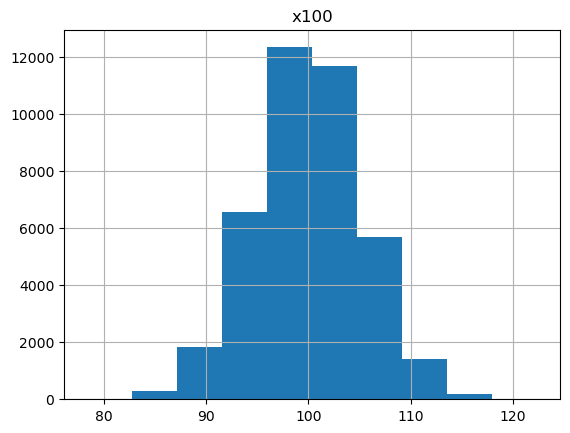

In [17]:
## we can take a look at the distributions of the numerical values
for i in non_cat_cols:
    print(df_num.hist(column = i))

In [18]:
## we can take a look at the numerical variables and see if we need to normalize/standardize any numerical variables

In [19]:
## missing values

In [20]:
df_num.describe()

y            x1            x2            x4            x5  \
count  40000.000000  40000.000000  40000.000000  40000.000000  37572.000000   
mean       0.145075      2.999958     20.004865      0.002950      0.005396   
std        0.352181      1.994490      1.604291      1.462185      1.297952   
min        0.000000     -3.648431     13.714945     -5.137161     -5.616412   
25%        0.000000      1.592714     18.921388     -1.026798     -0.872354   
50%        0.000000      2.875892     20.005944      0.002263      0.008822   
75%        0.000000      4.270295     21.083465      1.043354      0.892467   
max        1.000000     13.837591     27.086468      5.150153      5.698128   

                 x6            x8            x9           x10           x11  \
count  40000.000000  40000.000000  40000.000000  40000.000000  34890.000000   
mean       0.007234      0.004371      2.722334      0.490339    100.008988   
std        1.358551      1.447223      1.966828      1.029863     13.343010   
min       -6.113153     -6.376810     -3.143438     -3.538129     50.526543   
25%       -0.909831     -0.971167      1.340450     -0.207833     91.056682   
50%        0.007335      0.002226      2.498876      0.486926    100.020965   
75%        0.926222      0.985023      3.827712      1.182994    109.025025   
max        5.639372      5.869889     18.006669      4.724186    148.784484   

                x12           x13           x14           x15           x16  \
count  40000.000000  40000.000000  30136.000000  40000.000000  28788.000000   
mean       3.039317      3.881807      0.787999      0.011162    100.702408   
std        3.575534      2.678838      0.751117      1.480175      1.058560   
min       -5.846331     -3.060994     -0.338985     -6.141315     99.131018   
25%       -0.200773      1.987650      0.189364     -0.986405     99.857805   
50%        3.073967      3.444608      0.677067      0.016980    100.540700   
75%        6.266835      5.319072      1.267256      1.007430    101.371152   
max       11.149273     25.634165      4.291924      5.930678    104.753426   

                x17           x18           x20           x21           x22  \
count  40000.000000  40000.000000  40000.000000  40000.000000  37613.000000   
mean       8.005758     79.936742      4.962774     11.030799     72.135445   
std        2.270345      6.514228      3.544050     15.652503     26.890151   
min       -1.384508     66.756855     -9.561032     -3.819778      4.263648   
25%        6.465327     74.015148      2.558445      1.349311     52.710060   
50%        8.003181     79.857023      4.982334      5.080475     68.963429   
75%        9.537869     85.907545      7.337529     14.648950     88.047645   
max       18.018633     93.909754     19.549984    196.185637    241.587355   

                x23           x25           x26           x27           x28  \
count  40000.000000  40000.000000  37567.000000  40000.000000  40000.000000   
mean       0.202855      4.979892      0.001688    999.260857     15.022117   
std        1.020094      2.442622      1.562125    104.197073      3.669128   
min       -3.943834     -2.489909     -6.516479    604.067215     -1.074573   
25%       -0.484283      3.256295     -1.050565    928.783472     12.534429   
50%        0.198314      4.846035      0.001465    999.470648     15.017631   
75%        0.889074      6.529241      1.061446   1069.255479     17.501026   
max        4.713963     18.691319      6.696843   1415.094219     30.411096   

                x29          x30           x32           x34           x35  \
count  40000.000000  7664.000000  40000.000000  40000.000000  40000.000000   
mean       1.009982     0.020762      0.552148     52.971716      1.377624   
std        1.418182     1.565846      1.893282      5.808011      1.678159   
min       -4.165802    -4.775358     -3.966788     29.351461     -3.500424   
25%        0.023706    -1.094994     -0.493818     49.046559      0.

In [21]:
## taking a look at the numerical variables there are various ways to handle missing the data
# using the assumption that the missing data is "Missing completely at random" or "Missing at random"
# we can use techniques such as - simple imputations ie, using mean, median or mode
# iterative imputation, KNN impulation, etc.

In [22]:
#For the missing data in the categorical variables, we have options such as:
#simple impute such as most frequest value or use missing data as a value in the variable
#we would have to decide specifically for each categorical variable which we would perform

In [23]:
## after dealing with missing data with categorical variables we can then use the a type of encoder such as:
# OneHotEncoder, LabelEncoder, etc.